# Additional Visualizations

## General SOTA DP-Performance Graph
Display performance of non-adapted SOTA models under DP, compared to their performance without DP.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# perf data
dp_performances = np.array([0.42, 0.33, 0.61, 0.41, 0.49, 0.44, 0.59, 0.39])
nodp_performances = np.array([0.82, 0.78, 0.75, 0.70, 0.81, 0.83, 0.86, 0.87])

# grad data (GGN of best run)
dp_GGNs = np.array([12.0, 14.0, 23.0, 34.0, 9.0, 7.0, 24.0, 26.0])
nodp_GGNs = np.array([3.0, 5.0, 7.0, 6.0, 4.0, 2.0, 9.0, 4.0])

# search data (params of best DP-runs)
best_L2_clips = np.array([1.0, 3.2, 4.3, 2.3, 5.4, 2.2, 7.8, 9.2])
best_epochs = np.array([15, 30, 15, 15, 15, 30, 30, 15])

# model meta
model_names = np.array(["ResNet18_GN", "VGG11_GN", "DenseNet121_GN", "MobileNetV3_GN", 
                "GoogLeNet_GN", "Xception_GN", "DenseNet201_GN", "WideResNet50_GN"])
model_sizes = np.array([11.2, 128.0, 8.0, 4.2, 5.6, 20.8, 18.1, 18.1])

# TODO: automate fetching data
# Create Pandas DataFrame
runs_df = pd.DataFrame(
    {
        "model":model_names,
        "size":model_sizes, 
        "dp_performance":dp_performances, 
        "nodp_performance":nodp_performances, 
        "dp_GGN":dp_GGNs, 
        "nodp_GGN":nodp_GGNs, 
        "best_L2":best_L2_clips, 
        "best_epoch":best_epochs,
    },
)
runs_df

,model,size,dp_performance,nodp_performance,dp_GGN,nodp_GGN,best_L2,best_epoch
0,ResNet18_GN,11.2,0.42,0.82,12.0,3.0,1.0,15
1,VGG11_GN,128.0,0.33,0.78,14.0,5.0,3.2,30
2,DenseNet121_GN,8.0,0.61,0.75,23.0,7.0,4.3,15
3,MobileNetV3_GN,4.2,0.41,0.70,34.0,6.0,2.3,15
4,GoogLeNet_GN,5.6,0.49,0.81,9.0,4.0,5.4,15
5,Xception_GN,20.8,0.44,0.83,7.0,2.0,2.2,30
6,DenseNet201_GN,18.1,0.59,0.86,24.0,9.0,7.8,30
7,WideResNet50_GN,18.1,0.39,0.87,26.0,4.0,9.2,15


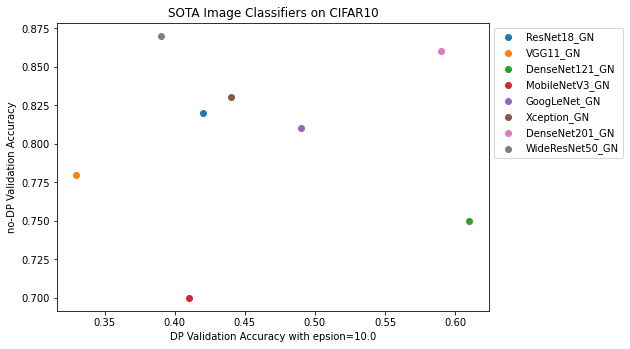

In [15]:
# Plot Nr. 1 - Scatter Plot DP/no-DP SOTA performances
fig = plt.figure()
axis = fig.add_axes([0, 0, 1, 1])

for i in range(len(dp_performances)): 
    axis.scatter(dp_performances[i], nodp_performances[i], label=model_names[i])

axis.legend(bbox_to_anchor=(1,1),loc="upper left")
axis.set_xlabel("DP Validation Accuracy with epsion=10.0")
axis.set_ylabel("no-DP Validation Accuracy")
axis.set_title("SOTA Image Classifiers on CIFAR10")
plt.show()
#plt.scatter(dp_performances, nodp_performances, c='g')

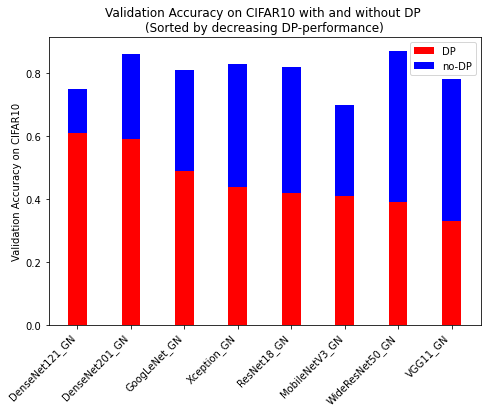

In [16]:
# Plot Nr. 2 - Bar Plot DP/no-DP SOTA performances

# order based on decreasing DP performance
# on negative dp_performances bs argsort works only increasing order
# negating array inverts this order (highest is lowest)
dec_dp_perf_indices = (-dp_performances).argsort()

# apply order
new_nodp_perfomances = nodp_performances[dec_dp_perf_indices]
new_dp_performances = dp_performances[dec_dp_perf_indices]
new_model_names = model_names[dec_dp_perf_indices]

# calculate difference for plot
diff_nodp_dp = new_nodp_perfomances-new_dp_performances

width = 0.35
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.bar(new_model_names, new_dp_performances, width, color='r')
axis.bar(new_model_names, diff_nodp_dp, width, bottom=new_dp_performances, color='b')
axis.set_ylabel('Validation Accuracy on CIFAR10')
axis.set_title('Validation Accuracy on CIFAR10 with and without DP \n(Sorted by decreasing DP-performance)')

plt.xticks(rotation=45, ha="right")
axis.legend(labels=['DP', 'no-DP'])
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

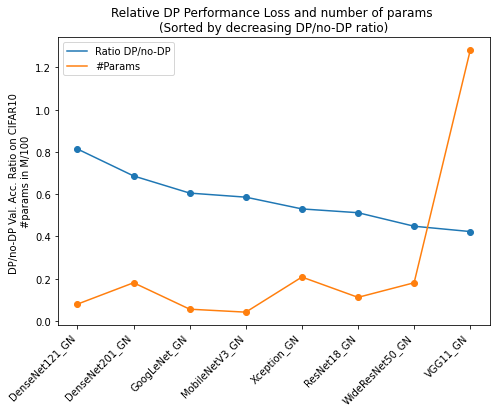

In [17]:
# Plot Nr. 3 

# TODO: we could also think about plotting the relation to the #params for each 
# architecture type separately (e.g. ResNet18, ResNet50, ResNet152, etc.)

ratio_dp_nodp = dp_performances/nodp_performances
dec_dp_ratio_indices = (-ratio_dp_nodp).argsort()

# apply order
ratio_dp_nodp = ratio_dp_nodp[dec_dp_ratio_indices]
new_model_names = model_names[dec_dp_ratio_indices]
new_model_sizes = model_sizes[dec_dp_ratio_indices]

width = 0.35
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])

axis.scatter(new_model_names, ratio_dp_nodp)
axis.plot(new_model_names, ratio_dp_nodp, label="Ratio DP/no-DP")

axis.scatter(new_model_names, new_model_sizes/100)
axis.plot(new_model_names, new_model_sizes/100, label="#Params")

axis.set_ylabel('DP/no-DP Val. Acc. Ratio on CIFAR10 \n#params in M/100')
axis.set_title('Relative DP Performance Loss and number of params \n(Sorted by decreasing DP/no-DP ratio)')

plt.legend()
plt.xticks(rotation=45, ha="right")

## Gradient Graphs
Could be used to reveil more information about the GGN with and without DP for different SOTA models.<br>
Easy variant compared to following section. 

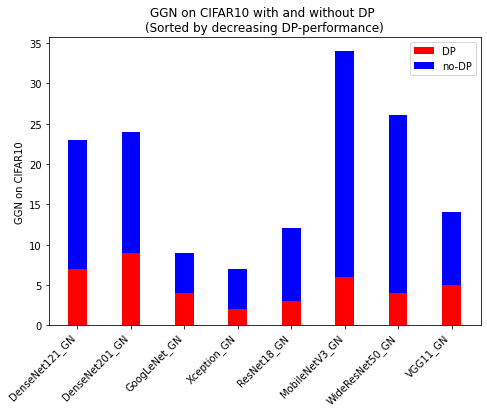

In [18]:
# TODO: think about normalizing with #params as absolute GGNs are larger for many params (higher dim)
# Figure 1 - GGN Value DP and non-DP as part of it

# order based on decreasing DP performance (to be able to compare better with above Plot Nr. 2)
dec_dp_perf_indices = (-dp_performances).argsort()
# OR by decreasing DP GGN
#dec_GGN_magnitude_indices = (-dp_GGNs).argsort()

# apply order
new_nodp_perfomances = nodp_performances[dec_dp_perf_indices]
new_dp_performances = dp_performances[dec_dp_perf_indices]
new_nodp_GGNs = nodp_GGNs[dec_dp_perf_indices]
new_dp_GGNs = dp_GGNs[dec_dp_perf_indices]
new_model_names = model_names[dec_dp_perf_indices]

# calculate difference for plot
diff_nodp_dp = new_nodp_perfomances-new_dp_performances
diff_dp_nodp_GGNs = new_dp_GGNs-new_nodp_GGNs

width = 0.35
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.bar(new_model_names, new_nodp_GGNs, width, color='r')
axis.bar(new_model_names, diff_dp_nodp_GGNs, width, bottom=new_nodp_GGNs, color='b')
axis.set_ylabel('GGN on CIFAR10')
axis.set_title('GGN on CIFAR10 with and without DP \n(Sorted by decreasing DP-performance)')

plt.xticks(rotation=45, ha="right")
axis.legend(labels=['DP', 'no-DP'])
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

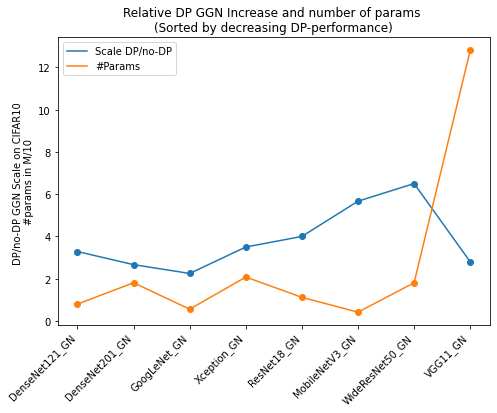

In [19]:
# Figure 2 - GGN DP/-no-DP Scale Factor and ordered by highest scale factor
# Plot Nr. 3 

# TODO: we could also think about plotting the relation to the #params for each 
# architecture type separately (e.g. ResNet18, ResNet50, ResNet152, etc.)

ratio_dp_nodp = dp_performances/nodp_performances
scale_dp_nodp_GGNs = dp_GGNs/nodp_GGNs

# dec_dp_ratio_indices = (-ratio_dp_nodp).argsort()
# dec_dp_scale_indices = (-scale_dp_nodp_GGNs).argsort()
# NOTE: currently sorted by decreasing DP-Performance

# apply order
new_scale_dp_nodp_GGNs = scale_dp_nodp_GGNs[dec_dp_perf_indices]
new_model_names = model_names[dec_dp_perf_indices]
new_model_sizes = model_sizes[dec_dp_perf_indices]

width = 0.35
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])

axis.scatter(new_model_names, new_scale_dp_nodp_GGNs)
axis.plot(new_model_names, new_scale_dp_nodp_GGNs, label="Scale DP/no-DP")

axis.scatter(new_model_names, new_model_sizes/10)
axis.plot(new_model_names, new_model_sizes/10, label="#Params")

axis.set_ylabel('DP/no-DP GGN Scale on CIFAR10 \n#params in M/10')
axis.set_title('Relative DP GGN Increase and number of params \n(Sorted by decreasing DP-performance)')

plt.legend()
plt.xticks(rotation=45, ha="right")

## Search Param Graphs
Graphs based on "optimal" L2 clip norms and number of epochs.
Specific questions to answer: 
* Is it better to train longer (with more noise) or shorter (with less noise)? Does this depend on the size of the model?
* What relation does the "optimal" L2-clip norm have with the number of params and the GGN (in the DP case and in the non-DP case)?
* Is the L2 clip norm correlated with the number of epochs? (here it's hard to tell whether any direct causality exists, as more likely both are linked to the number of params)?
* Are there any patterns of different model architectures having similar L2-clips or Epochs (comparison apart from just looking at the number of params)?

<AxesSubplot:title={'center':'Histogram - Number of epochs of the best runs'}, xlabel='epochs', ylabel='Number of runs'>

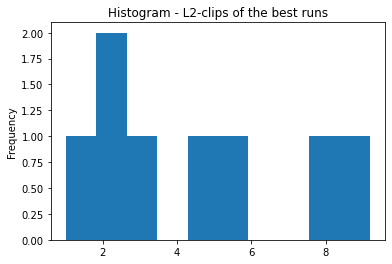

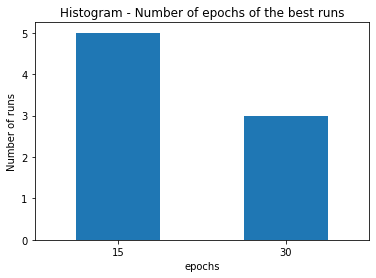

In [137]:
# Figure 1a - Probability Distributions based on optimal params - L2-, Epoch-Histograms 
# NOTE: Could think about a more sophisticated probabilistic modelling

runs_df["best_L2"].plot.hist(
    title="Histogram - L2-clips of the best runs",
    rot=0, 
)

# Figure 1b - same for num of epochs
runs_df["best_epoch"].value_counts().plot.bar(
    # with .plot otherwise this is plotted directly into the previous plot
    figure=plt.figure(), 
    title="Histogram - Number of epochs of the best runs",
    ylabel="Number of runs",
    xlabel="epochs",
    rot=0, 
)


<AxesSubplot:title={'center':'Epochs of best run grouped by L2 clip'}, xlabel='best_L2'>

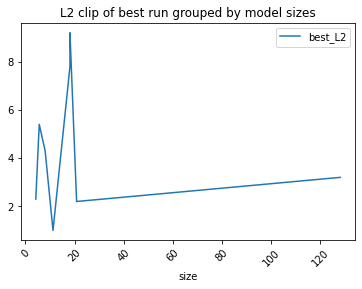

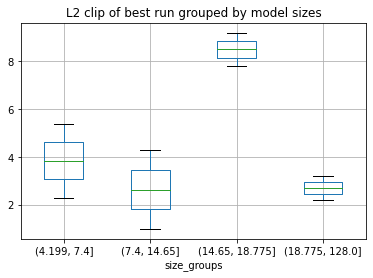

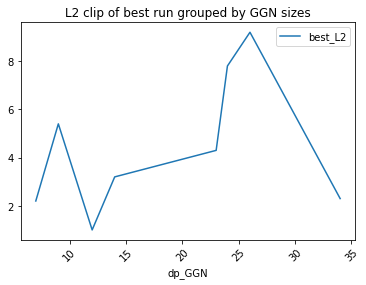

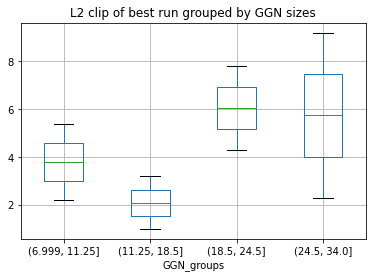

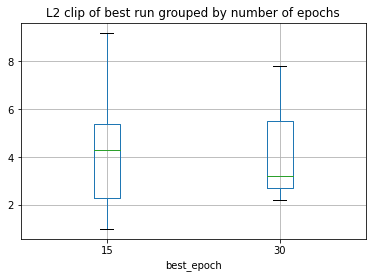

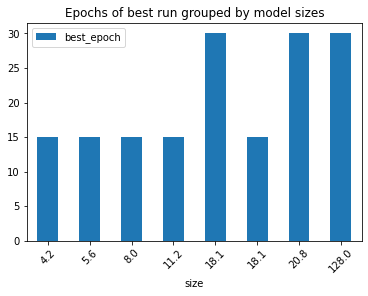

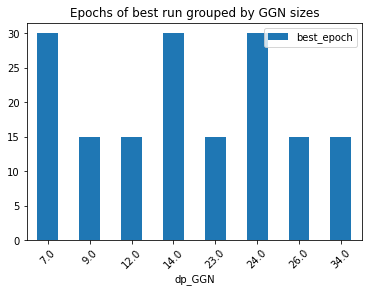

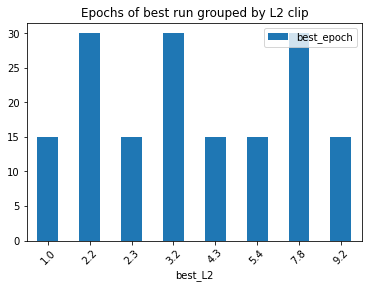

In [99]:
# Figure 2 - L2-, Epoch-Histograms for different clusters: box-plots 
# grouped by num-param-buckets, GGN-buckts, or all "wide"/"deep"/"small"/"big" manual models, L2-buckets, Epoch-buckets

# index arrays based on wanted groups 
# NOTE: check boxplot details here: 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot

# L2
# 1. group by num params
title="L2 clip of best run grouped by model sizes"
# line plot 
runs_df.sort_values("size").plot("size", "best_L2", rot=45, title=title)
# box plot - split in 4 groups
runs_df["size_groups"] = pd.qcut(runs_df["size"], 4)
runs_df.boxplot(column="best_L2", by="size_groups")
# in order to change the title
plt.title(title)
plt.suptitle("")

# 2. group by ggn
title="L2 clip of best run grouped by GGN sizes"
# line plot 
runs_df.sort_values("dp_GGN").plot("dp_GGN", "best_L2", rot=45, title=title)
# box plot - split in 4 groups
runs_df["GGN_groups"] = pd.qcut(runs_df["dp_GGN"], 4)
runs_df.boxplot(column="best_L2", by="GGN_groups")
# in order to change the title
plt.title(title)
plt.suptitle("")

# 3. group by epochs
title="L2 clip of best run grouped by number of epochs"
# box plot 
runs_df.boxplot(column="best_L2", by="best_epoch")
# in order to change the title
plt.title(title)
plt.suptitle("")

# Epochs
# 1. group by num params
title="Epochs of best run grouped by model sizes"
runs_df.sort_values("size").plot.bar("size", "best_epoch", rot=45, title=title)

# 2. group by ggn
title="Epochs of best run grouped by GGN sizes"
runs_df.sort_values("dp_GGN").plot.bar("dp_GGN", "best_epoch", rot=45, title=title)

# 3. group by L2
title="Epochs of best run grouped by L2 clip"
runs_df.sort_values("best_L2").plot.bar("best_L2", "best_epoch", rot=45, title=title)

<Axes:xlabel='model', ylabel='best_L2'>

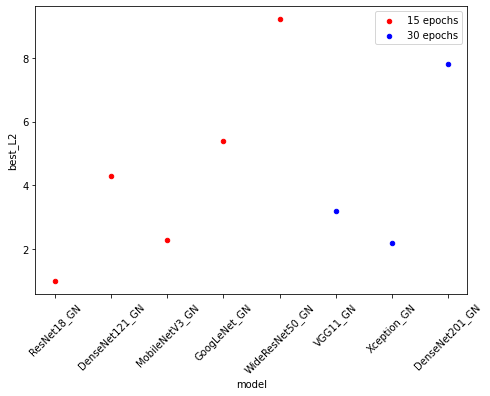

In [144]:
# Figure 3 - Clustering of model architectures based on optimal L2 and Epochs
# NOTE: think about doing kNNs and visualizing clusters
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])

# pass in axis to plot on the same figure
runs_df[runs_df["best_epoch"]==15].plot.scatter("model", "best_L2", ax=axis, color="r", label="15 epochs", rot=45)
runs_df[runs_df["best_epoch"]==30].plot.scatter("model", "best_L2", ax=axis, color="b", label="30 epochs", rot=45)

## Advanced Smoothness Plots
Based on the visual, qualitative smoothness evaluation of the loss landscape in the NIPS paper "How Does Batch Normalization Help Optimization?" by Santurkar et al., NIPS 2018. 

In [23]:
# Figure 1 - Loss Landscape


In [24]:
# Figure 2 - Gradient Predictiveness


In [ ]:
# Figure 3 - Effective Beta-Smoothness